import libs

In [10]:
import os
import sys
import torch
import importlib

current_dir = os.getcwd()
project_root = os.path.dirname(current_dir) 
sys.path.append(project_root)

# Import our custom modules
import src.utils as utils
import src.plots as plots
import src.neural_network_scratch as nn_scratch

from src.utils import load_transform_split_mnist, per_class_accuracy
from src.plots import plot_train_val_curves, plot_confusion_matrix, plot_per_class_acc
from src.neural_network_scratch import NeuralNetworkScratch

Load Data loaders

In [11]:
# Using the same utility from Part A, but loading all classes
train_loader, val_loader, test_loader, _, _, _ = load_transform_split_mnist(
    val_size=0.2, 
    classes=None, # None means all 10 classes
    batch_size=64
)

print("Data loaders created successfully.")

100%|██████████| 9.91M/9.91M [00:08<00:00, 1.23MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 185kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 909kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.5MB/s]


Data loaders created successfully.


Initialize and Train Model

In [12]:
INPUT_DIM = 28 * 28   # for flattened 28x28 image
HIDDEN1 = 128  
HIDDEN2 = 64
OUTPUT_DIM = 10

LEARNING_RATE = 0.01
EPOCHS = 20
model = NeuralNetworkScratch(INPUT_DIM, HIDDEN1, HIDDEN2, OUTPUT_DIM)
print(model)

print("\nStarting Neural Network Training...")
print("#" * 60)

model.fit(train_loader, val_loader, epochs=EPOCHS, lr=LEARNING_RATE)

print("#" * 60)
print("Training complete!")

NeuralNetworkScratch(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Starting Neural Network Training...
############################################################
Epoch  1/20 | Train Loss: 0.9934, Train Acc: 74.25% | Val Loss: 0.4794,   Val Acc: 87.15%
Epoch  2/20 | Train Loss: 0.4050, Train Acc: 88.70% | Val Loss: 0.3602,   Val Acc: 89.62%
Epoch  3/20 | Train Loss: 0.3336, Train Acc: 90.41% | Val Loss: 0.3149,   Val Acc: 90.85%
Epoch  4/20 | Train Loss: 0.2983, Train Acc: 91.41% | Val Loss: 0.2918,   Val Acc: 91.53%
Epoch  5/20 | Train Loss: 0.2744, Train Acc: 92.08% | Val Loss: 0.2696,   Val Acc: 92.21%
Epoch  6/20 | Train Loss: 0.2547, Train Acc: 92.67% | Val Loss: 0.2551,   Val Acc: 92.62%
Epoch  7/20 | Train Loss: 0.2382, Train Acc: 93.17% | Val Loss: 0.2405,   Val Acc: 93.11%
Epoch  8/20 | Train Loss: 0.2241, Train Acc: 93.59% | Val Loss: 0

Performance Visualization

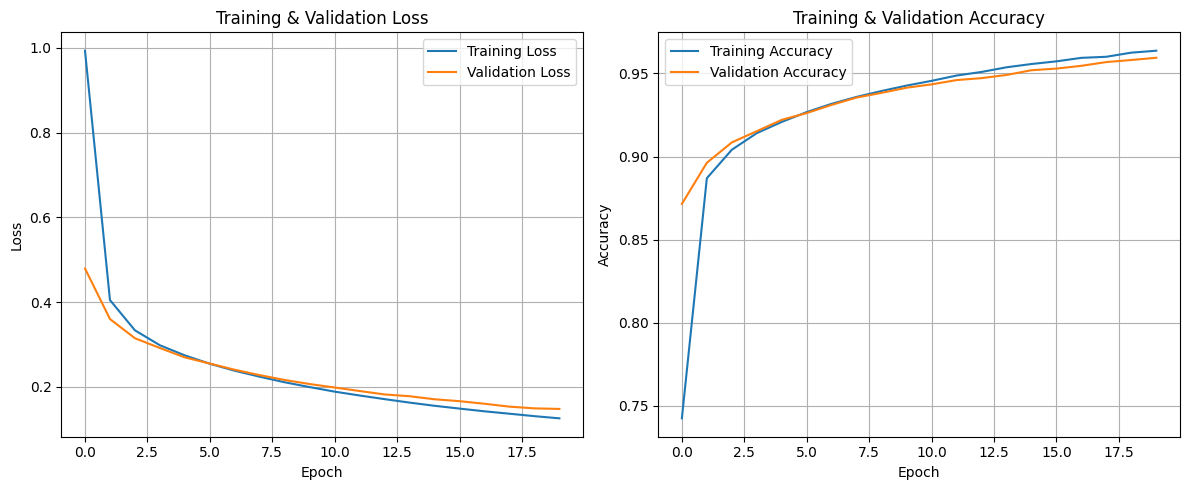

In [13]:
# B3: Plot Training and validation loss/accuracy over epochs
plot_train_val_curves(model.history)

Final Test Set Evaluation


Generating Confusion Matrix for Test Set...


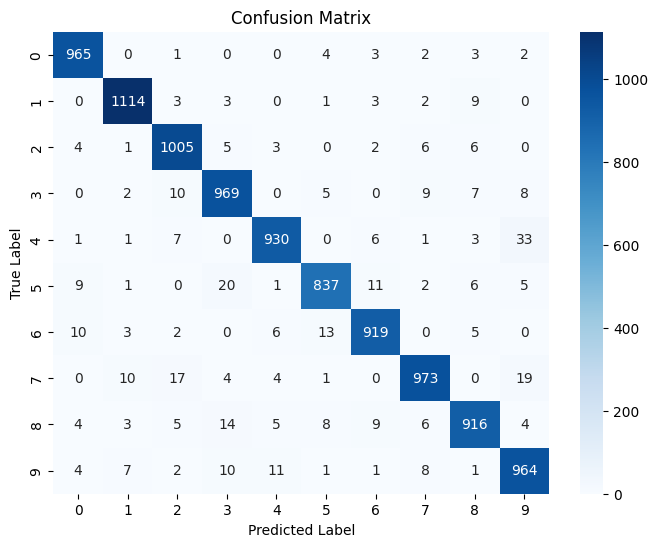


Generating Per-Class Accuracy for Test Set...
   Class  Accuracy
0      0  0.984694
1      1  0.981498
2      2  0.973837
3      3  0.959406
4      4  0.947047
5      5  0.938341
6      6  0.959290
7      7  0.946498
8      8  0.940452
9      9  0.955401


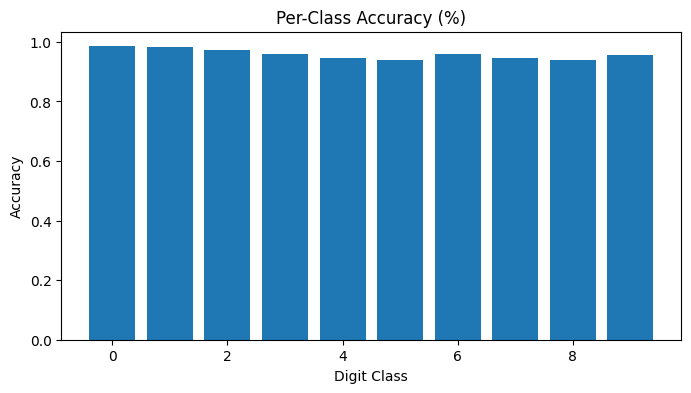

In [14]:
import numpy as np
# Get predictions for the entire test set
y_test = []
y_pred_test = []

model.eval() # Set model to evaluation mode
with torch.no_grad():
    for X, y in test_loader:
        preds = model.predict(X)
        y_test.extend(y.numpy())
        y_pred_test.extend(preds.numpy())

# B3: Plot Confusion Matrix
print("Generating Confusion Matrix for Test Set...")
cm = plot_confusion_matrix(y_test, y_pred_test)

# B3: Per-class accuracy analysis
print("\nGenerating Per-Class Accuracy for Test Set...")
df_acc = per_class_accuracy(cm)
plot_per_class_acc(df_acc)